# Lung Cancer_Logistic

In [118]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from functools import reduce
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [119]:
df = pd.read_csv('/Users/tmh/Desktop/MedBlob/lung cancer/lungcancer(normalized).csv')
df.columns

Index(['Unnamed: 0', 'SEQN', 'Gender', 'RaceMexican American',
       'RaceOther Hispanic', 'RaceNon-Hispanic White',
       'RaceNon-Hispanic Black', 'Race6\tNon-Hispanic Asian',
       'RaceOther Race - Including Multi-Racial', 'MCQ300A', 'MCQ300B',
       'MCQ300C', 'MCQ365A', 'MCQ365B', 'MCQ365C', 'MCQ365D', 'MCQ160K',
       'SMQ020', 'SMQ890', 'SMQ900', 'SMQ910', 'CDQ001', 'VTQ281A', 'VTQ281C',
       'VTQ281E', 'Age', 'SMD460', 'URXUAS', 'LBDBCRSI', 'avg_betacarotene',
       'y'],
      dtype='object')

In [120]:
df = df[df.columns[2:].to_list()]
df

,Gender,RaceMexican American,RaceOther Hispanic,RaceNon-Hispanic White,RaceNon-Hispanic Black,Race6\tNon-Hispanic Asian,RaceOther Race - Including Multi-Racial,MCQ300A,MCQ300B,MCQ300C,...,CDQ001,VTQ281A,VTQ281C,VTQ281E,Age,SMD460,URXUAS,LBDBCRSI,avg_betacarotene,y
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0.002236,0.000000,0.000049,0.000201,0.118881,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0.001911,0.000036,0.000233,0.000201,0.029026,0
2,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0.002812,0.000036,0.000586,0.000201,0.051706,0
3,1,0,1,0,0,0,0,1,1,1,...,1,0,0,0,0.002055,0.000000,0.000169,0.000201,0.066021,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0.002885,0.000000,0.000141,0.000201,0.046208,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0.001478,0.000000,0.004811,0.000201,0.067175,0
825,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.002308,0.000000,0.000225,0.000201,0.006995,0
826,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0.002885,0.000000,0.000265,0.000201,0.140786,0
827,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.002236,0.000036,0.002712,0.000756,0.040204,0


In [121]:
X = df[df.columns[0:-1]].values
y = df['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [122]:
print(X.shape)
print(y.shape)

(829, 28)
(829,)


In [123]:
class LogisticRegressionClassifier:

    def __init__(self, n=100):
        self.n = n

    def fit(self, X, y, random_state=42, criterion='entropy'):
        X_train_p = X[y==1]
        X_train_n = X[y==0]
        y_train_p = y[y==1]
        y_train_n = y[y==0]
        l = sum(y_train_p)
        clf_list = []
        np.random.seed(seed=random_state)
        for i in range(self.n):
            idx_n = np.random.choice(range(X_train_n.shape[0]), l)
            idx_p = np.random.choice(range(X_train_p.shape[0]), l)
            X_train_f = np.concatenate([X_train_n[idx_n, :], X_train_p[idx_p]])
            y_train_f = np.concatenate([y_train_n[idx_n], y_train_p[idx_p]])
            clf = LogisticRegression()
            clf.fit(X_train_f, y_train_f)
            clf_list.append(clf)
            print(f'\rClassifier {i+1} completed.', end='')
        self.clfs = clf_list        
    
    def coefficients(self):
        feature_importance = abs(self.clfs[0].coef_)
        for tree in self.clfs[1:]:
            feature_importance += tree.coef_
        return feature_importance/ self.n
    
    def predict(self, X):
        result_list = list(map(lambda clf: clf.predict_proba(X)[:,1], self.clfs))
        score = reduce(lambda a, b: a+b, result_list) / len(self.clfs)
        return score
        
    def report(self, X, y):
        y_hat = self.predict(X)
        print(classification_report(y_test, 1.*(y_hat>0.5)))

In [124]:
btc = LogisticRegressionClassifier(1000)
btc.fit(X_train, y_train)
y_hat = 1.0 * (btc.predict(X_test)>0.5)

Classifier 1000 completed.

In [125]:
btc.coefficients()

array([[-1.89178098e-02, -6.03768047e-02, -5.78934682e-02,
         4.81689235e-02,  1.25007833e-01, -3.86986865e-02,
        -1.53169543e-02,  1.48252772e-01,  1.31752152e-01,
         1.77003705e-02, -1.52642835e-01,  2.03383590e-01,
         5.18068156e-02,  4.32641263e-02,  1.91879085e-01,
         2.41886964e-01,  6.43340668e-02,  3.90243895e-01,
        -6.60715121e-02,  3.17320591e-01, -1.26873171e-02,
        -1.85201824e-02,  2.02488099e-01, -1.16090165e-04,
         9.50780315e-06, -1.40264197e-04, -2.95453369e-05,
        -2.35060687e-02]])

In [126]:
reshaped_cof = pd.DataFrame(btc.coefficients().reshape(-1,1))
predictors_final = pd.DataFrame(df[df.columns[0:-1]].columns)
predictors_final.index = np.arange(1,len(predictors_final)+1)
reshaped_cof.index =  np.arange(1,len(reshaped_cof)+1)

In [127]:
coefficient_tb1= pd.concat([predictors_final,reshaped_cof], axis=1, ignore_index=True)
coefficient_tb2 = coefficient_tb1.rename(columns={0: "Predictor", 1: "Coefficient"})
coefficient_tb_final = coefficient_tb2.sort_values(by=["Coefficient"],ascending=False)
coefficient_tb_final.head(10)
#coefficient_tb_final.to_csv('coefficient_tb_final.csv')

,Predictor,Coefficient
18,SMQ900,0.390244
20,CDQ001,0.317321
16,SMQ020,0.241887
12,MCQ365B,0.203384
23,VTQ281E,0.202488
15,MCQ160K,0.191879
8,MCQ300A,0.148253
9,MCQ300B,0.131752
5,RaceNon-Hispanic Black,0.125008
17,SMQ890,0.064334


In [128]:
print(classification_report(y_true=y_test, y_pred=y_hat))

              precision    recall  f1-score   support

           0       0.99      0.88      0.94       207
           1       0.00      0.00      0.00         1

    accuracy                           0.88       208
   macro avg       0.50      0.44      0.47       208
weighted avg       0.99      0.88      0.93       208



In [129]:
confusion_matrix(y_true=y_test, y_pred=y_hat)

array([[183,  24],
       [  1,   0]])

In [130]:
feature_importance = abs(coefficient_tb_final[coefficient_tb_final.columns[1]])
feature_importance = 100.0 * (feature_importance / feature_importance.max())

In [131]:
score = feature_importance.head(10)
predictors_10 = coefficient_tb_final[coefficient_tb_final.columns[0]].head(10)
feature_importance_table = pd.concat([predictors_10,score], axis=1)
feature_importance_table
feature_importance_table_desc = feature_importance_table.sort_values(by=["Coefficient"],ascending=True)
feature_importance_table_desc

,Predictor,Coefficient
17,SMQ890,16.485605
5,RaceNon-Hispanic Black,32.033258
9,MCQ300B,33.761490
8,MCQ300A,37.989774
15,MCQ160K,49.169017
23,VTQ281E,51.887576
12,MCQ365B,52.117046
16,SMQ020,61.983536
20,CDQ001,81.313403
18,SMQ900,100.000000


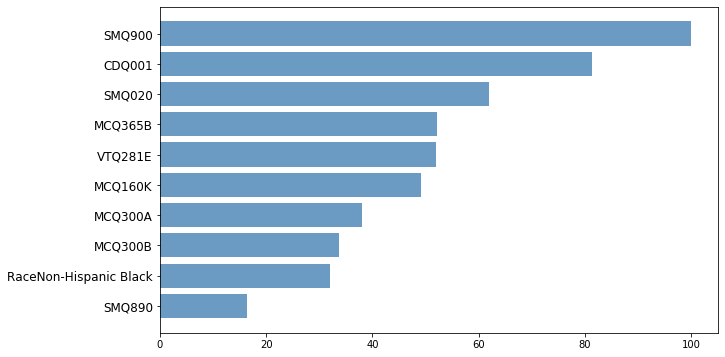

In [132]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,6))

share = feature_importance_table_desc[feature_importance_table_desc.columns[1]]
plt.barh(range(10), share, align = 'center',color='steelblue', alpha = 0.8)

plt.yticks(range(10),feature_importance_table_desc[feature_importance_table_desc.columns[0]], fontsize=12)
#ax.set_xlabels('Relative Feature Importance (%)')
#xticks(np.arange(10), ['Tom', 'Dick', 'Sue']) 
#plt.tight_layout()   
plt.show()

In [133]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
 
nmc = 25 

# set up dictionary for grid search
#  dictionary name must now include pipeline function name then __
max_depth = [10,15,20,25,30]
max_features = [3,5,7] 
n_estimators = 100
param_grid={'max_features': max_features,'max_depth': max_depth}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.2,n_splits=nmc,random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])


    rank_test_score  mean_test_score param_max_features param_max_depth
0                 1         0.993735                  3              10
1                 1         0.993735                  5              10
2                 1         0.993735                  7              10
3                 1         0.993735                  3              15
4                 1         0.993735                  5              15
5                 1         0.993735                  7              15
6                 1         0.993735                  3              20
7                 1         0.993735                  5              20
8                 1         0.993735                  7              20
9                 1         0.993735                  3              25
10                1         0.993735                  5              25
11                1         0.993735                  7              25
12                1         0.993735                  3         

In [134]:
clf=RandomForestClassifier(max_depth=10,max_features=3)
clf.fit(X,y)
print(clf.score(X_test,y_test))



0.9951923076923077


In [135]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X=pd.DataFrame(X)

In [136]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)
feature_importances = 100.0 * (feature_importances / feature_importances.max())
score = feature_importances.head(10)
print(score)

    importance
23  100.000000
25   99.709314
27   74.001326
22   58.284465
9    40.652687
19   35.484809
0    32.597126
24   31.382200
14   26.260054
16   23.075651


In [137]:
index=[23,25,27,22,9,19,0,24,14,16]
for i in index:
    print(df.columns[i])

Age
URXUAS
avg_betacarotene
VTQ281E
MCQ300C
CDQ001
Gender
SMD460
MCQ160K
SMQ890


In [ ]:
Age
URXUAS arsenic
avg_betacarotene 
VTQ281E nail enamels
MCQ300C Close relative had diabetes
chest pain 
Gender
SMD460  Exposure to second-hand smoke
MCQ160K  Chronic bronchitis
SMQ890   cigar